In this notebook, we propose a demonstartion of different expression analysis in omicverse. We apply our implementation as well as the original code on the bulk data of Alzheimer's disease.

# Different expression analysis

## Setting up data

In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import Pyomic as ov
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

2023-05-17 17:12:09.829761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 17:12:09.907765: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-17 17:12:09.907783: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-17 17:12:10.801164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

/mnt/data/env/pyomic/lib/python3.8/site-packages/phate/__init__.py


In [5]:
bulk_adata=sc.read('bulk_adata_ad.h5ad')
bulk_adata

AnnData object with n_obs × n_vars = 90 × 16504
    obs: 'Unnamed: 0', 'RNAIsolation.Group', 'Dissection.Group', 'Sample.ID', 'Case.Year', 'Case.Num', 'Region', 'Neuropath.Dx.1', 'Neuropath.Dx.2', 'Age', 'Sex', 'PMI', 'APoE', 'Clinical.Syndrome', 'Tangle.Stage', 'Plaque.Stage', 'Diagnosis', 'Plaques.Tangles', 'Braak...Braak.Stage', 'Dissection.By', 'RNA.Isolation.By', 'RIN', 'Library.Group', 'Sequencing.Group', 'TOTAL_READS', 'PF_READS', 'PF_READS_ALIGNED', 'PCT_PF_READS_ALIGNED', 'PF_ALIGNED_BASES', 'PF_HQ_ALIGNED_READS', 'PF_HQ_ALIGNED_BASES', 'PF_HQ_ALIGNED_Q20_BASES', 'PF_MISMATCH_RATE', 'PF_HQ_ERROR_RATE', 'PF_INDEL_RATE', 'READS_ALIGNED_IN_PAIRS', 'STRAND_BALANCE', 'PCT_CHIMERAS', 'PCT_ADAPTER', 'UNPAIRED_READS_EXAMINED', 'UNMAPPED_READS', 'READ_PAIR_DUPLICATES', 'READ_PAIR_OPTICAL_DUPLICATES', 'PERCENT_DUPLICATION', 'ESTIMATED_LIBRARY_SIZE', 'PF_BASES', 'PF_ALIGNED_BASES.1', 'RIBOSOMAL_BASES', 'CODING_BASES', 'UTR_BASES', 'INTRONIC_BASES', 'INTERGENIC_BASES', 'CORRECT_STRAND_REA

In [ ]:
adata.obs['name']=adata.obs.index
adata.obs['name']=adata.obs['name'].astype('category')

In [4]:
bulk_adata.obs['Region'].value_counts()

FC    90
Name: Region, dtype: int64

In [5]:
bulk_adata.obs['Neuropath.Dx.1'].value_counts()

Alzheimer's disease               44
Normal (Mild Braak Changes)       34
Normal - No Pathology Detected     8
Normal (Mild Vascular Changes)     4
Name: Neuropath.Dx.1, dtype: int64

In [6]:
bulk_adata.obs['Neuropath.Dx.2'].value_counts()

Unused                                                    77
Hippocampal Sclerosis                                      8
Acute Cerebral Hypoxia                                     1
Diffuse Leukencephalopathy                                 1
Meningiom- Left Hemi (frozen tissue from right hemi)       1
Meningioma - right hemi (frozen tissue from left hemi)     1
Other                                                      1
Name: Neuropath.Dx.2, dtype: int64

In [7]:
bulk_adata.obs['APoE'].value_counts()

e33    26
e43    26
e32     8
e42     3
e44     3
Name: APoE, dtype: int64

In [8]:
bulk_adata.obs['Clinical.Syndrome'].value_counts()

[Dem]         32
[MCI]          6
[NonADDEM]     6
[Norm]         4
[QCI]          2
Name: Clinical.Syndrome, dtype: int64

In [9]:
bulk_adata.obs['Tangle.Stage'].value_counts()

Stage 6    24
Stage 5    21
Stage 1    15
Stage 2    13
Stage 3    11
Stage 4     5
Name: Tangle.Stage, dtype: int64

In [12]:
bulk_adata.obs['Plaque.Stage'].value_counts()

Stage C    27
Stage A    26
Stage B    25
None       11
Name: Plaque.Stage, dtype: int64

In [13]:
bulk_adata.obs['Diagnosis'].value_counts()

Control    46
AD         44
Name: Diagnosis, dtype: int64

In [6]:
bulk_adata.var_names_make_unique()

## Different expression object

In [7]:
data=bulk_adata.T.to_df()

In [8]:
dds=ov.bulk.pyDEG(data)

In [9]:
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


In [10]:
dds.normalize()
print('... estimateSizeFactors and normalize success')

... estimateSizeFactors and normalize success


In [8]:
data.head()

,Sample-1,Sample-10,Sample-100,Sample-101,Sample-11,Sample-12,Sample-13,Sample-14,Sample-16,Sample-17,...,Sample-89,Sample-90,Sample-91,Sample-92,Sample-93,Sample-94,Sample-95,Sample-97,Sample-98,Sample-99
symbol,,,,,,,,,,,,,,,,,,,,,
CELF3,5.411992,5.372127,5.918649,6.533444,5.701608,5.707154,6.424472,6.555146,6.126113,6.940997,...,5.634366,6.583671,5.788903,6.126700,6.589674,6.446354,6.130510,4.964971,6.207335,5.715709
FCRL5,7.547789,7.615529,7.766842,7.622182,7.623010,7.460036,7.553843,7.342730,7.310592,7.635867,...,7.390826,8.098926,7.313549,7.729042,8.356948,7.326740,7.627201,7.177275,7.831815,7.543531
SETP11,5.889153,5.115322,4.894407,5.754578,5.770548,5.400205,5.892261,5.409041,5.540659,5.976911,...,4.897572,5.088561,5.054412,5.981792,5.487043,5.619745,5.443136,3.290396,6.425835,5.221976
ATP8B2,8.669230,7.934054,8.232009,8.193802,8.276058,8.466156,8.377337,8.226151,7.897574,8.919280,...,7.910346,8.488744,7.982265,8.152369,8.640233,8.281754,8.195569,7.644456,8.232993,8.382407
NECTIN2,8.109728,7.792938,8.040775,7.943382,8.304275,8.599941,8.523495,7.900356,7.760688,8.762688,...,8.399589,8.340689,8.203156,7.808631,7.486781,7.568620,7.827593,7.655904,8.766994,7.659839


In [11]:
treatment_groups=bulk_adata.obs.loc[bulk_adata.obs['Diagnosis']=='AD'].index
control_groups=bulk_adata.obs.loc[bulk_adata.obs['Neuropath.Dx.1']=='Normal - No Pathology Detected'].index
result=dds.deg_analysis(treatment_groups,control_groups,method='ttest')
result.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
symbol,,,,,,,,,,,
CELF3,0.269397,0.853069,1.027478,0.569606,0.069016,11.922977,2.575673,0.039108,0.039108,0.102748,normal
FCRL5,0.154940,0.783915,1.012305,0.809838,0.105731,15.251217,2.930852,0.017644,0.017644,0.101230,normal
SETP11,0.049244,0.647936,1.069283,1.307650,0.188468,10.816493,2.435161,0.096643,0.096643,0.106928,normal
ATP8B2,0.748306,0.977829,1.003292,0.125921,0.009737,16.723324,3.063790,0.004742,0.004742,0.100329,normal
NECTIN2,0.300599,0.866719,1.018567,0.522013,0.062122,16.502714,3.044631,0.026541,0.026541,0.101857,normal


In [12]:
result.qvalue=result.pvalue
result['-log(qvalue)']=result['-log(pvalue)']

In [30]:
print(result.shape)
result=result.loc[result['log2(BaseMean)']>1]
print(result.shape)

(16504, 11)
(16396, 11)


In [190]:
dds.result=result.loc[result['abs(log2FC)']<1]

In [49]:
dds.result['log2FC']=dds.result['log2FC'].fillna(0)

In [13]:
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=0.15,
                   pval_threshold=0.05,
                   logp_max=6)

... Fold change threshold: 0.15


In [18]:
dds.result.to_csv('deg_res.csv')

(-0.5, 0.5)

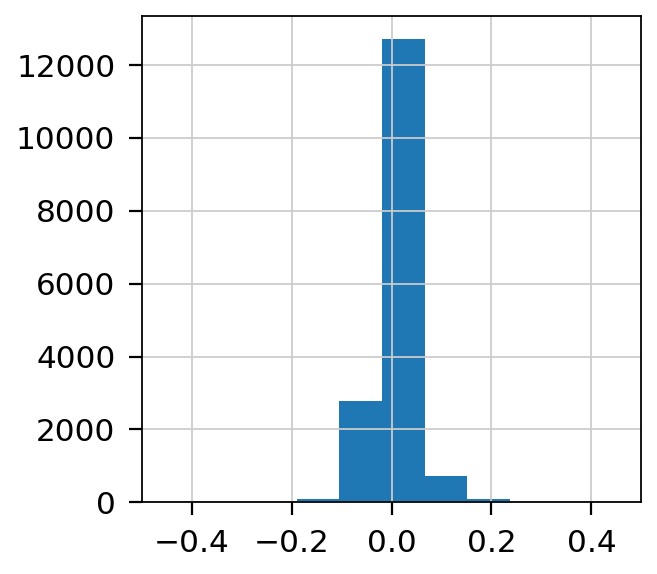

In [15]:
plt.hist(dds.result['log2FC'],bins=100)
plt.xlim(-0.5,0.5)

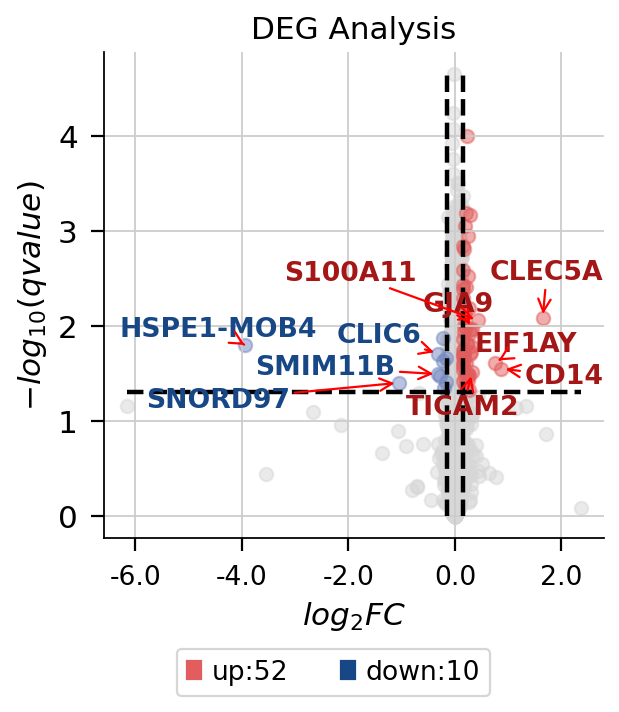

In [16]:
dds.plot_volcano(title='DEG Analysis',figsize=(4,4),
                 plot_genes=result.loc[result['pvalue']<0.05].sort_values('abs(log2FC)',ascending=False).index[:10],
                 #plot_genes_num=20,
                 plot_genes_fontsize=12,)
plt.savefig("figures/deg_vol.png",dpi=300,bbox_inches = 'tight')
#plt.xlim(-1,1)

In [13]:
result.loc[result['pvalue']<0.05].sort_values('abs(log2FC)',ascending=False).index[:10]

Index(['HSPE1-MOB4', 'CLEC5A', 'SNORD97', 'CD14', 'EIF1AY', 'S100A11',
       'TICAM2', 'GJA9', 'SMIM11B', 'CLIC6'],
      dtype='object', name='symbol')

In [197]:
data.loc['CLEC5A']

Sample-1      1.299839
Sample-10     0.011549
Sample-100   -0.257921
Sample-101    0.654572
Sample-11     1.262795
                ...   
Sample-94    -1.603970
Sample-95    -1.081690
Sample-97     1.104223
Sample-98     1.090415
Sample-99     0.047309
Name: CLEC5A, Length: 90, dtype: float32

In [119]:
from statsmodels.stats.multitest import fdrcorrection
qvalue=fdrcorrection(np.nan_to_num(np.array(result.pvalue),0), alpha=0.1, method='indep', is_sorted=False)

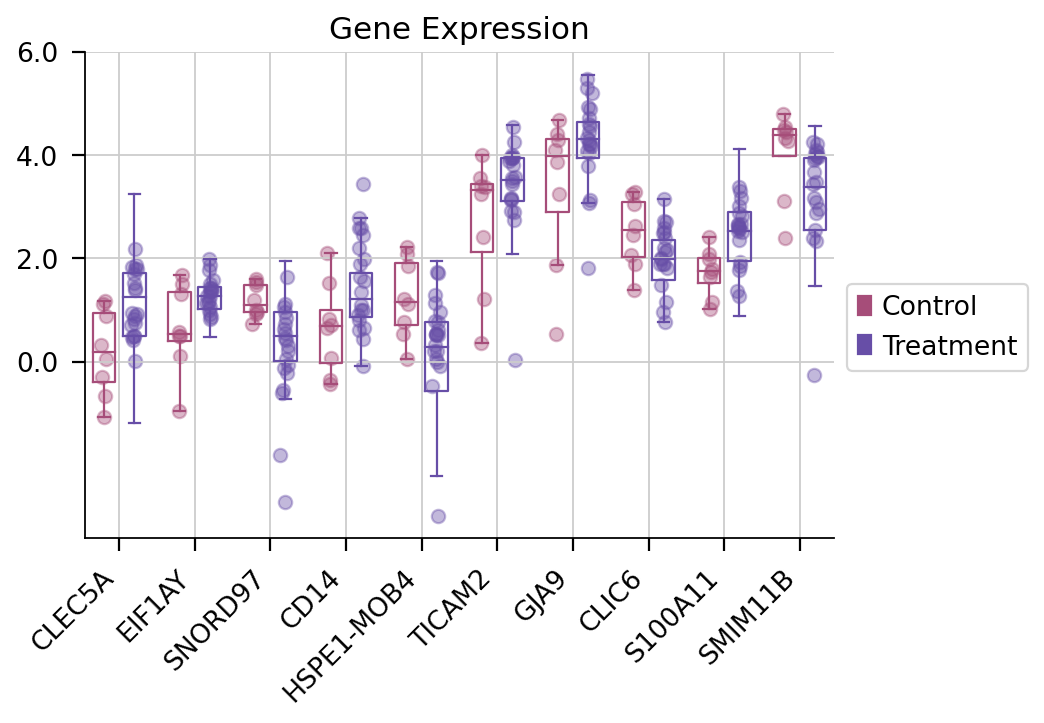

In [26]:


dds.plot_boxplot(genes=result.loc[result['pvalue']<0.05].sort_values('abs(log2FC)',ascending=False).index[:10],
                 treatment_groups=treatment_groups,
                 control_groups=control_groups,figsize=(6,4),fontsize=12,
                 legend_bbox=(1,0.55))
#labels=ax.ax_row_colors.xaxis.get_ticklabels()
plt.xticks(rotation=45, horizontalalignment='right',fontsize=12)
plt.savefig("figures/deg_exp1.png",dpi=300,bbox_inches = 'tight')

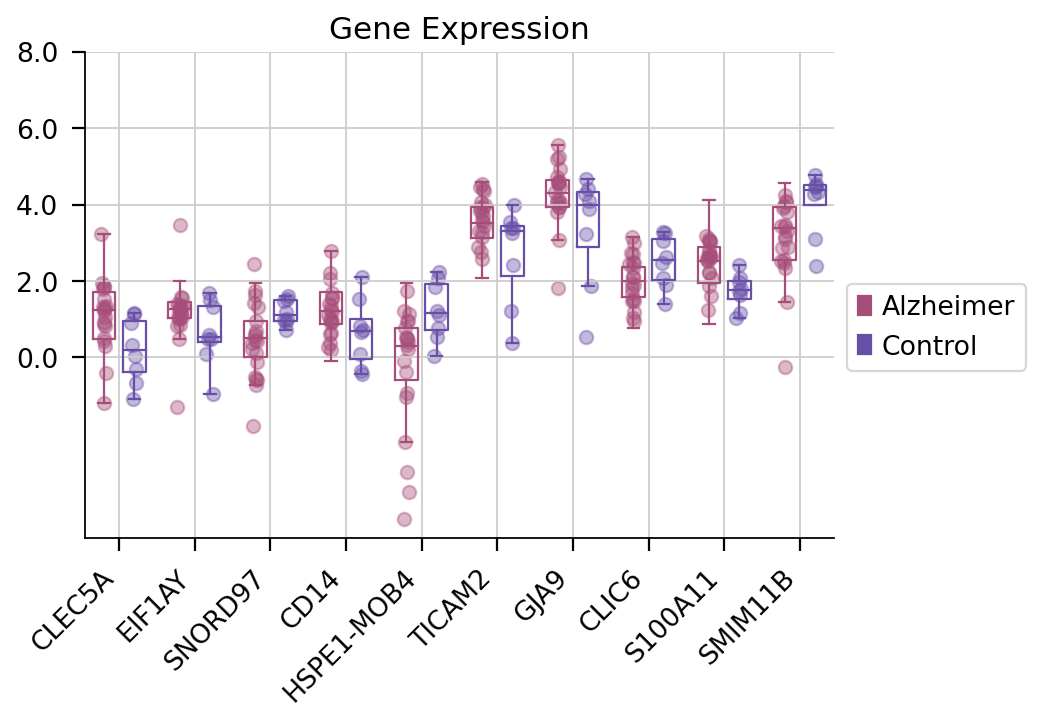

In [32]:
from Pyomic.utils import plot_boxplot
genes=result.loc[result['pvalue']<0.05].sort_values('abs(log2FC)',ascending=False).index[:10]
treatment_groups=treatment_groups
control_groups=control_groups
figsize=(6,4)
fontsize=12
legend_bbox=(1,0.55)
treatment_name='Alzheimer'
control_name='Control'

p_data=pd.DataFrame(columns=['Value','Gene','Type'])
for gene in genes:
    plot_data1=pd.DataFrame()
    plot_data1['Value']=dds.data[treatment_groups].loc[gene].values
    plot_data1['Gene']=gene
    plot_data1['Type']=treatment_name

    plot_data2=pd.DataFrame()
    plot_data2['Value']=dds.data[control_groups].loc[gene].values
    plot_data2['Gene']=gene
    plot_data2['Type']=control_name

    plot_data=pd.concat([plot_data1,plot_data2],axis=0)
    p_data=pd.concat([p_data,plot_data],axis=0)

fig,ax=plot_boxplot(p_data,hue='Type',x_value='Gene',y_value='Value',palette=["#a64d79","#674ea7"],
                  figsize=figsize,fontsize=fontsize,title='Gene Expression',
                  legend_bbox=legend_bbox,legend_ncol=1,)
#labels=ax.ax_row_colors.xaxis.get_ticklabels()
plt.xticks(rotation=45, horizontalalignment='right',fontsize=12)
plt.savefig("figures/deg_exp1.png",dpi=300,bbox_inches = 'tight')

In [ ]:
!ping www.baidu.com

In [216]:
result.loc[result['sig']!='normal']

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
symbol,,,,,,,,,,,
SNRPGP4,0.032959,0.032959,1.208645,1.482027,1.482027,3.385900,0.759539,0.273391,0.273391,0.120865,up
FAM157C,0.004026,0.004026,1.117741,2.395084,2.395084,11.288737,2.496812,0.160587,0.160587,0.111774,up
ADAMTS2,0.003730,0.003730,1.117407,2.428272,2.428272,9.980330,2.319088,0.160155,0.160155,0.111741,up
HLA-DMA,0.011655,0.011655,1.132572,1.933487,1.933487,9.246468,2.208902,0.179602,0.179602,0.113257,up
ROCK1P1,0.038752,0.038752,0.895768,1.411708,1.411708,12.126270,2.600064,-0.158803,0.158803,0.089577,down
...,...,...,...,...,...,...,...,...,...,...,...
NPIPB15,0.018558,0.018558,1.230769,1.731460,1.731460,8.905746,2.154737,0.299560,0.299560,0.123077,up
IGF2,0.015378,0.015378,1.177328,1.813095,1.813095,9.233749,2.206917,0.235517,0.235517,0.117733,up
RLBP1,0.019776,0.019776,1.119416,1.703867,1.703867,7.870911,1.976531,0.162746,0.162746,0.111942,up


## Geneset Enrichment

In [217]:
pathway_dict=ov.utils.geneset_prepare('../baby_analysis/genesets/WikiPathway_2021_Human.txt',organism='Human')

In [220]:
import omicverse as ov
deg_genes=result.loc[result['sig']!='normal'].index.tolist()
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                background=result.index.tolist(),
                                organism='Human')

/mnt/data/env/pyomic/lib/python3.8/site-packages/phate/__init__.py


In [ ]:
#Pathway Enrichment
deg_genes=result.loc[result['sig']!='normal'].index.tolist()
pathway_dict=ov.utils.geneset_prepare('WikiPathway_2021_Human.txt',
                                      organism='Human')
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                background=result.index.tolist(),
                                organism='Human')


<AxesSubplot:title={'center':'Wiki Pathway enrichment'}, xlabel='Fractions of genes'>

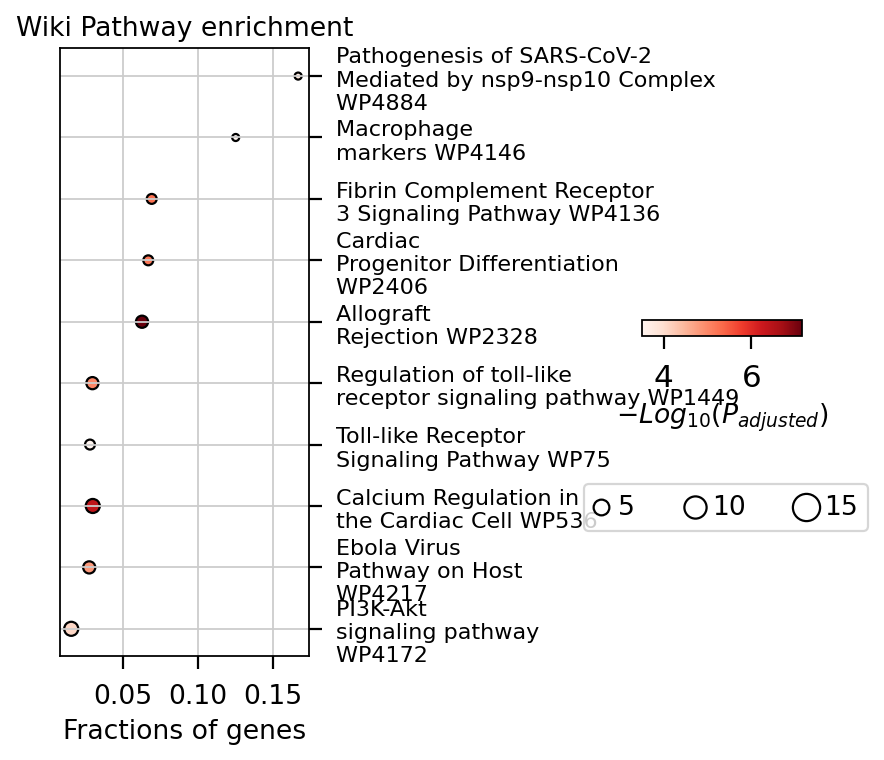

In [223]:
ov.bulk.geneset_plot(enr,figsize=(2,5),fig_title='Wiki Pathway enrichment',
                        cmap='Reds')

In [222]:
ov.utils.pyomic_plot_set()

In [224]:
import gseapy as gp
help(gp.prerank)

Help on function prerank in module gseapy.gsea:

prerank(rnk, gene_sets, outdir='GSEA_Prerank', pheno_pos='Pos', pheno_neg='Neg', min_size=15, max_size=500, permutation_num=1000, weighted_score_type=1, ascending=False, processes=1, figsize=(6.5, 6), format='pdf', graph_num=20, no_plot=False, seed=None, verbose=False)
    Run Gene Set Enrichment Analysis with pre-ranked correlation defined by user.
    
    :param rnk: pre-ranked correlation table or pandas DataFrame. Same input with ``GSEA`` .rnk file.
    :param gene_sets: Enrichr Library name or .gmt gene sets file or dict of gene sets. Same input with GSEA.
    :param outdir: results output directory.
    :param int permutation_num: Number of permutations for significance computation. Default: 1000.
    :param int min_size: Minimum allowed number of genes from gene set also the data set. Default: 15.
    :param int max_size: Maximum allowed number of genes from gene set also the data set. Defaults: 500.
    :param str weighted_score

In [225]:
result['fcsign']=np.sign(result['log2FC'])
result['logp']=-np.log10(result['pvalue'])
result['metric']=result['logp']/result['fcsign']

In [228]:
rnk=pd.DataFrame()

rnk['gene_name']=result.index
rnk['rnk']=result['metric'].values
rnk=rnk.sort_values(by=['rnk'],ascending=False)
k=1
total=0
for i in range(len(rnk)):
    if rnk.loc[i,'rnk']==np.inf: 
        total+=1
#200跟274根据你的数据进行更改，保证inf比你数据最大的大，-inf比数据最小的小就好
for i in range(len(rnk)):
    if rnk.loc[i,'rnk']==np.inf: 
        rnk.loc[i,'rnk']=200+(total-k)
        k+=1
    elif rnk.loc[i,'rnk']==-np.inf: 
        rnk.loc[i,'rnk']=-(274+k)
        k+=1
#rnk=rnk.replace(np.inf,300)
#rnk=rnk.replace(-np.inf,-300)
rnk.head()

,gene_name,rnk
12762,GK3P,4.005219
8130,GATAD2A,3.509306
3870,TTC26,3.497201
10489,BBS1,3.431648
13981,CYP1A2,3.366436


In [229]:
pre_res = gp.prerank(rnk=rnk, gene_sets=pathway_dict,
                     processes=8,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='gsea', format='png', seed=112)

2023-05-17 01:46:05,289 Input gene rankings contains NA values(gene name and ranking value), drop them all!


In [234]:
pre_res.res2d.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Cholesterol metabolism (includes both Bloch and Kandutsch-Russell pathways) WP4718,-0.631260,-1.940563,0.0,0.0,46,42,CYP46A1;ACOT2;EBP;MVD;GGPS1;FASN;ELOVL4;MVK;SO...,LBR;FADS1;ELOVL5;ACSL4;SC5D;MYLIP;LSS;TM7SF2;F...
Electron Transport Chain (OXPHOS system in mitochondria) WP111,-0.539531,-2.018188,0.0,0.0,103,87,SLC25A6;NDUFA3;UQCR10;SCO1;ATP5MF;UQCRH;SURF1;...,NDUFAB1;NDUFA12;COX17;NDUFA10;ATP5MC1;ATP5MC3;...
Photodynamic therapy-induced HIF-1 survival signaling WP3614,-0.650097,-2.000134,0.0,0.0,37,32,ANGPT1;MCL1;IGFBP3;TP53;BAK1;SERPINE1;EDN1;NOS...,ARNT;PKM;PGK1;SLC2A3;SLC16A1;EGLN1;TGFA;LDHA;V...
Sphingolipid Metabolism (integrated pathway) WP4726,-0.673750,-1.989815,0.0,0.0,25,23,SGPL1;CERS1;UGCG;CERS6;DEGS2;CERS5;SGPP2;SGMS2...,PLPP3;DEGS1;CERS2;KDSR;SGMS1;UGT8;SMPD1;SPTLC1...
Sphingolipid pathway WP1422,-0.644701,-1.983666,0.0,0.0,30,26,SPTLC3;SGPL1;UGCG;CERS6;CERS5;SGPP2;GBA2;B4GAL...,ASAH1;PPP2CA;GBA;SERINC1;CERS2;GAL3ST1;KDSR;PP...


Text(0.5, 1.0, '')

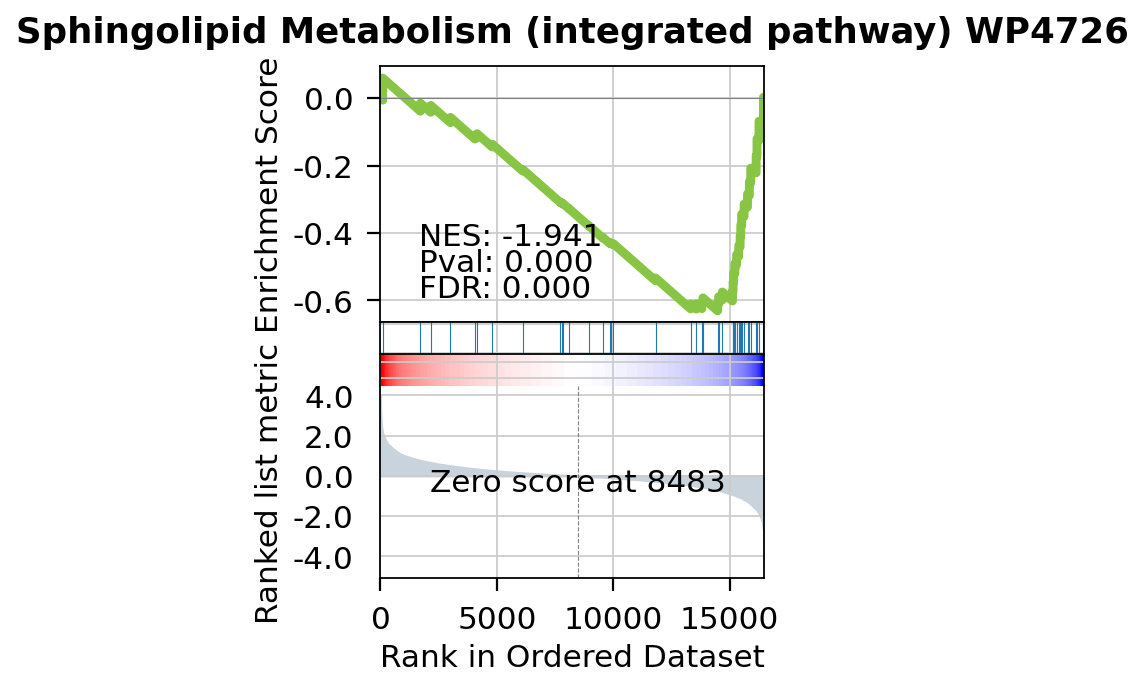

In [257]:
terms = pre_res.res2d.index
from gseapy.plot import gseaplot,GSEAPlot
# to save your figure, make sure that ofname is not None
gseaplot(rank_metric=pre_res.ranking, term=terms[3],figsize=(3,4), **pre_res.results[terms[0]])
plt.title('')

In [259]:
fig=GSEAPlot(rank_metric=pre_res.ranking, term=terms[3],figsize=(3,4), **pre_res.results[terms[0]])

<Figure size 240x320 with 0 Axes>

In [278]:
terms[1]

'Electron Transport Chain (OXPHOS system in mitochondria) WP111'

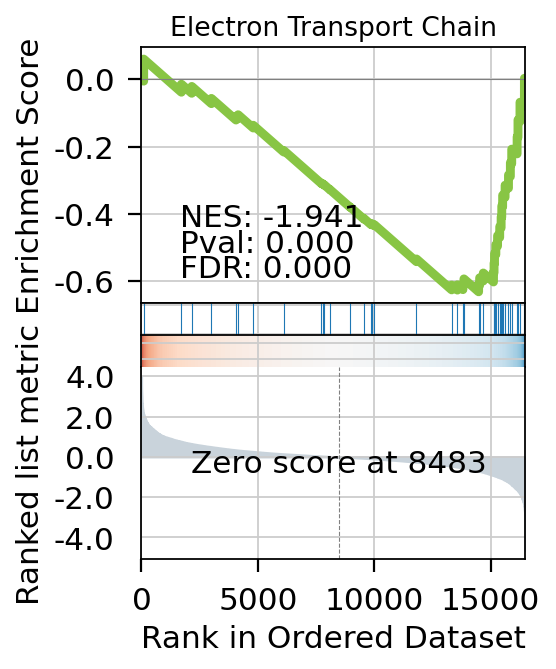

In [282]:
g = GSEAPlot(
        rank_metric=pre_res.ranking, term=terms[1],figsize=(3,4),cmap='RdBu_r',
    **pre_res.results[terms[0]]
    )
g.fig.suptitle('Electron Transport Chain',fontsize=12,y=0.95)
g.add_axes()
g.fig.savefig("figures/gseapy_1.png",dpi=300,bbox_inches = 'tight')

In [254]:
help(gseaplot)

Help on function gseaplot in module gseapy.plot:

gseaplot(rank_metric, term, hit_indices, nes, pval, fdr, RES, pheno_pos='', pheno_neg='', figsize=(6, 5.5), cmap='seismic', ofname=None, **kwargs)
    This is the main function for reproducing the gsea plot.
    
    :param rank_metric: pd.Series for rankings, rank_metric.values.
    :param term: gene_set name
    :param hit_indices: hits indices of rank_metric.index presented in gene set S.
    :param nes: Normalized enrichment scores.
    :param pval: nominal p-value.
    :param fdr: false discovery rate.
    :param RES: running enrichment scores.
    :param pheno_pos: phenotype label, positive correlated.
    :param pheno_neg: phenotype label, negative correlated.
    :param figsize: matplotlib figsize.
    :param ofname: output file name. If None, don't save figure



In [244]:
enrich_res=pre_res.res2d[pre_res.res2d['fdr']<0.05]
enrich_res['logp']=-np.log(enrich_res['fdr']+0.0001)
enrich_res['logc']=-enrich_res['nes']
enrich_res['num']=enrich_res['matched_size']
enrich_res['fraction']=enrich_res['matched_size']/enrich_res['geneset_size']
enrich_res['Term']=enrich_res.index.tolist()

In [245]:
enrich_res['P-value']=enrich_res['fdr']

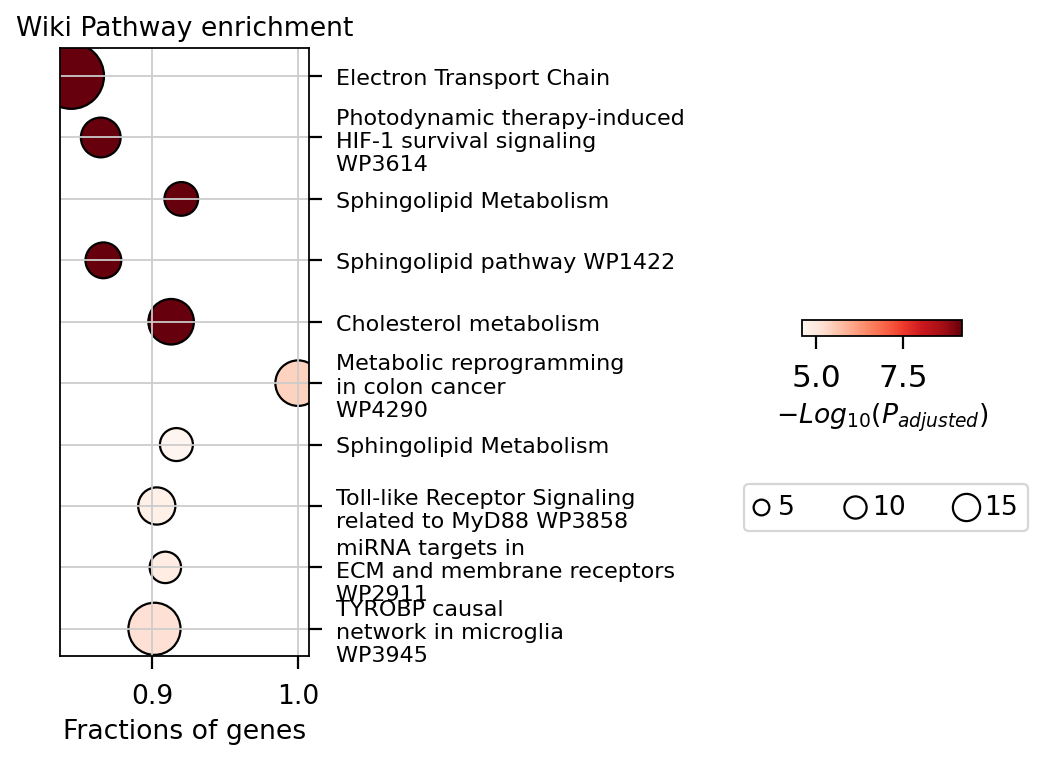

In [283]:
ov.bulk.geneset_plot(enrich_res,figsize=(2,5),fig_title='Wiki Pathway enrichment',
                        cmap='Reds',text_maxsize=30,cax_loc=2.5)
plt.savefig("figures/gseapy_scatter.png",dpi=300,bbox_inches = 'tight')